# Librerias necesarias

In [1452]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    RidgeCV,
    ElasticNetCV,
    LassoCV,
    SGDRegressor,
    LogisticRegression
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
     mean_squared_error, 
     r2_score, 
     mean_absolute_error,
     classification_report, 
     confusion_matrix,
     ConfusionMatrixDisplay,
     balanced_accuracy_score, 
     log_loss,
     roc_curve, 
     roc_auc_score, 
     auc,
     accuracy_score
)
import shap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score as sklearn_f1_score

# Carga de datos

In [1234]:
file_path = "weatherAUS.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

# Limpieza y transformacion de datos

1) Elimino la columna 'Unnamed: 0' porque es un indice que esta de mas.
2) Segun el enunciado, unicamente nos interesan las ciudades Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport por lo que filtro el DataSet para quedarme unicamente con los datos de dichas ciudades.

3) Elimino de una vez la variable 'Location' debido a que el enunicado declara que se pueden considerar como una unica ubicacion.

In [1235]:
df = df.drop("Unnamed: 0", axis=1)
ciudades = [
    " Adelaide",
    "Canberra",
    "Cobar",
    "Dartmoor",
    "Melbourne",
    "MelbourneAirport",
    "MountGambier",
    "Sydney",
    "SydneyAirport",
]
df = df[df["Location"].isin(ciudades)]
df = df.drop("Location", axis=1)

---

## Split de datos

Hago el split en df_train y df_test a partir de una fecha determinada para dejar aproximadamente un 80% de mis datos en Train y 20% en Test.

La fecha mas antigua del dataset es 01-11-2007 y la mas reciente es 24-06-2017. 
Decido hacer el split de datos a partir de la fecha 01-01-2016, concentrando aproximadamente el 80% de datos para el conjunto de entrenamiento, y el 20% restante para el conjunto de test.

In [1236]:
df["Date"] = pd.to_datetime(df["Date"])

fecha_mas_antigua = df['Date'].min()
fecha_mas_reciente = df['Date'].max()

print(f'Fecha mas antigua: {fecha_mas_antigua}')
print(f'Fecha mas reciente: {fecha_mas_reciente}')

Fecha mas antigua: 2007-11-01 00:00:00
Fecha mas reciente: 2017-06-24 00:00:00


In [1237]:
fecha_limite = "2016-01-01"

df_train = df[df["Date"] < fecha_limite]

df_test = df[df["Date"] >= fecha_limite]

print("Tamaño del conjunto de entrenamiento:", len(df_train))
print("Tamaño del conjunto de prueba:", len(df_test))

Tamaño del conjunto de entrenamiento: 20713
Tamaño del conjunto de prueba: 4328


---

## Tipos de datos y valores nulos

Observo una descripcion, el tipo de dato y los valores nulos de cada variable.

In [1238]:
df_train.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,20713,20271.000000,20284.000000,19981.000000,19461.000000,17369.000000,19159.000000,20366.000000,20382.000000,20023.000000,20068.000000,20008.000000,20016.000000,15867.000000,15593.000000,20258.000000,20265.000000,19981.000000
mean,2012-04-24 22:18:46.596823040,10.955991,21.647510,2.062940,4.675207,6.809471,42.885015,15.986252,20.811500,69.661489,50.862916,1018.303134,1016.178991,4.572761,4.687616,15.168388,20.142990,2.061859
min,2007-11-01 00:00:00,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,5.000000,1.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,2010-06-10 00:00:00,7.100000,16.500000,0.000000,2.200000,3.700000,33.000000,9.000000,15.000000,58.000000,37.000000,1013.400000,1011.300000,1.000000,2.000000,11.100000,15.200000,0.000000
50%,2012-04-17 00:00:00,10.600000,20.800000,0.000000,4.000000,7.300000,41.000000,15.000000,20.000000,71.000000,50.000000,1018.500000,1016.300000,6.000000,6.000000,14.700000,19.300000,0.000000
75%,2014-03-24 00:00:00,14.900000,25.800000,1.000000,6.400000,10.000000,52.000000,20.000000,26.000000,83.000000,64.000000,1023.400000,1021.200000,7.000000,7.000000,18.900000,24.200000,1.000000
max,2015-12-31 00:00:00,30.500000,46.800000,119.400000,64.800000,14.300000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.100000,119.400000
std,NaN,5.741061,6.573869,6.446013,3.401770,3.853102,14.462229,9.778937,9.218541,18.437859,20.014269,7.370028,7.236090,2.814362,2.619433,5.655393,6.410891,6.445336


In [1239]:
df_train.dtypes

Date                datetime64[ns]
MinTemp                    float64
MaxTemp                    float64
Rainfall                   float64
Evaporation                float64
Sunshine                   float64
WindGustDir                 object
WindGustSpeed              float64
WindDir9am                  object
WindDir3pm                  object
WindSpeed9am               float64
WindSpeed3pm               float64
Humidity9am                float64
Humidity3pm                float64
Pressure9am                float64
Pressure3pm                float64
Cloud9am                   float64
Cloud3pm                   float64
Temp9am                    float64
Temp3pm                    float64
RainToday                   object
RainTomorrow                object
RainfallTomorrow           float64
dtype: object

In [1240]:
df_train.isnull().sum()

Date                   0
MinTemp              442
MaxTemp              429
Rainfall             732
Evaporation         1252
Sunshine            3344
WindGustDir         1557
WindGustSpeed       1554
WindDir9am          1229
WindDir3pm           401
WindSpeed9am         347
WindSpeed3pm         331
Humidity9am          690
Humidity3pm          645
Pressure9am          705
Pressure3pm          697
Cloud9am            4846
Cloud3pm            5120
Temp9am              455
Temp3pm              448
RainToday            732
RainTomorrow         732
RainfallTomorrow     732
dtype: int64

Observo que las variables 'RainToday', 'RainTomorrow' y 'RainfallTomorrow' tienen igual cantidad de valores nulos.

Me fijo en que registros las tres columnas son nulas, son unicamente 570 registros, lo que representa aproximadamente un 2% de mi dataset, por lo que decido eliminarlos.

In [1241]:
# Registros de df_train donde las 3 variables son Nulas.
df_train[
    df_train["RainToday"].isnull()
    & df_train["RainTomorrow"].isnull()
    & df_train["RainfallTomorrow"].isnull()
]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6967,2011-08-09,7.4,13.0,NaN,NaN,NaN,WNW,28.0,WSW,W,...,51.0,1013.0,1011.1,8.0,7.0,8.2,12.5,NaN,NaN,NaN
6968,2011-08-10,6.5,16.7,NaN,NaN,NaN,WSW,26.0,NNW,W,...,64.0,1010.5,1007.7,NaN,8.0,11.4,12.7,NaN,NaN,NaN
7445,2012-11-29,23.9,41.7,NaN,11.2,NaN,SW,50.0,NNE,NNW,...,16.0,1011.5,1008.4,1.0,4.0,29.8,40.9,NaN,NaN,NaN
32570,2014-11-28,NaN,23.3,NaN,3.4,11.9,ENE,37.0,E,E,...,46.0,NaN,1021.3,3.0,2.0,NaN,22.3,NaN,NaN,NaN
46854,2011-06-04,4.4,13.2,NaN,2.2,0.6,NaN,NaN,NNW,WNW,...,58.0,NaN,NaN,8.0,NaN,10.6,11.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81030,2009-02-28,NaN,NaN,NaN,8.0,4.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81031,2009-03-01,NaN,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81032,2009-03-02,NaN,NaN,NaN,3.8,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81033,2009-03-03,NaN,NaN,NaN,8.0,1.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1242]:
df_train = df_train[
    ~(
        df_train["RainToday"].isnull()
        & df_train["RainTomorrow"].isnull()
        & df_train["RainfallTomorrow"].isnull()
    )
]

In [1243]:
print("Nulos RainToday:", df_train["RainToday"].isnull().sum())
print("Nulos RainTomorrow:", df_train["RainTomorrow"].isnull().sum())
print("Nulos RainfallTomorrow:", df_train["RainfallTomorrow"].isnull().sum())

Nulos RainToday: 162
Nulos RainTomorrow: 162
Nulos RainfallTomorrow: 162


En cada variable quedaron un total de 162 nulos, vuelvo a observar pero esta vez de a pares, en que variables hay nulos a la vez.

In [1244]:
print(
    "Nulos RainToday y RainTomorrow:",
    (df_train["RainToday"].isnull() & df_train["RainTomorrow"].isnull()).sum(),
)
print(
    "Nulos RainToday y RainfallTomorrow:",
    (df_train["RainToday"].isnull() & df_train["RainfallTomorrow"].isnull()).sum(),
)
print(
    "Nulos RainTomorrow y RainfallTomorrow:",
    (df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull()).sum(),
)

Nulos RainToday y RainTomorrow: 0
Nulos RainToday y RainfallTomorrow: 0
Nulos RainTomorrow y RainfallTomorrow: 162


Procedo a eliminar los registros nulos de las variables 'RainTomorrow' y 'RainfallTomorrow'.

In [1245]:
df_train[df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull()]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6292,2009-09-03,12.0,23.8,0.0,6.4,NaN,N,41.0,NNE,NNW,...,38.0,1016.3,1013.3,7.0,3.0,17.1,22.2,No,NaN,NaN
6966,2011-08-08,3.5,16.0,0.0,4.6,NaN,W,44.0,W,W,...,39.0,1014.7,1011.7,7.0,5.0,9.1,15.4,No,NaN,NaN
7444,2012-11-28,19.5,38.0,2.0,NaN,NaN,NaN,NaN,NaN,NNW,...,25.0,NaN,1010.0,2.0,2.0,26.6,36.6,Yes,NaN,NaN
31035,2010-06-18,9.8,18.0,0.6,3.0,9.6,NaN,NaN,W,W,...,39.0,1017.1,1015.5,NaN,NaN,12.1,17.8,No,NaN,NaN
31148,2010-10-09,15.8,18.9,0.0,5.2,0.0,ESE,31.0,ESE,ENE,...,55.0,1026.4,1025.3,NaN,NaN,17.0,18.3,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69427,2014-11-24,15.7,19.9,2.0,7.8,0.4,N,63.0,WSW,SW,...,88.0,1009.1,1006.5,7.0,NaN,17.5,18.3,Yes,NaN,NaN
69437,2014-12-04,17.6,27.7,8.6,1.8,11.8,SSE,35.0,SE,SSE,...,54.0,1010.2,1008.1,7.0,6.0,20.8,25.9,Yes,NaN,NaN
69453,2014-12-20,12.6,23.8,0.0,5.4,13.4,S,35.0,SSW,ESE,...,41.0,1019.3,1017.5,NaN,NaN,16.4,22.4,No,NaN,NaN
69470,2015-01-06,17.6,NaN,0.0,6.6,11.6,S,35.0,ENE,SSE,...,NaN,1020.2,NaN,3.0,NaN,20.7,NaN,No,NaN,NaN


In [1246]:
df_train = df_train[
    ~(df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull())
]

## Correlacion de variables

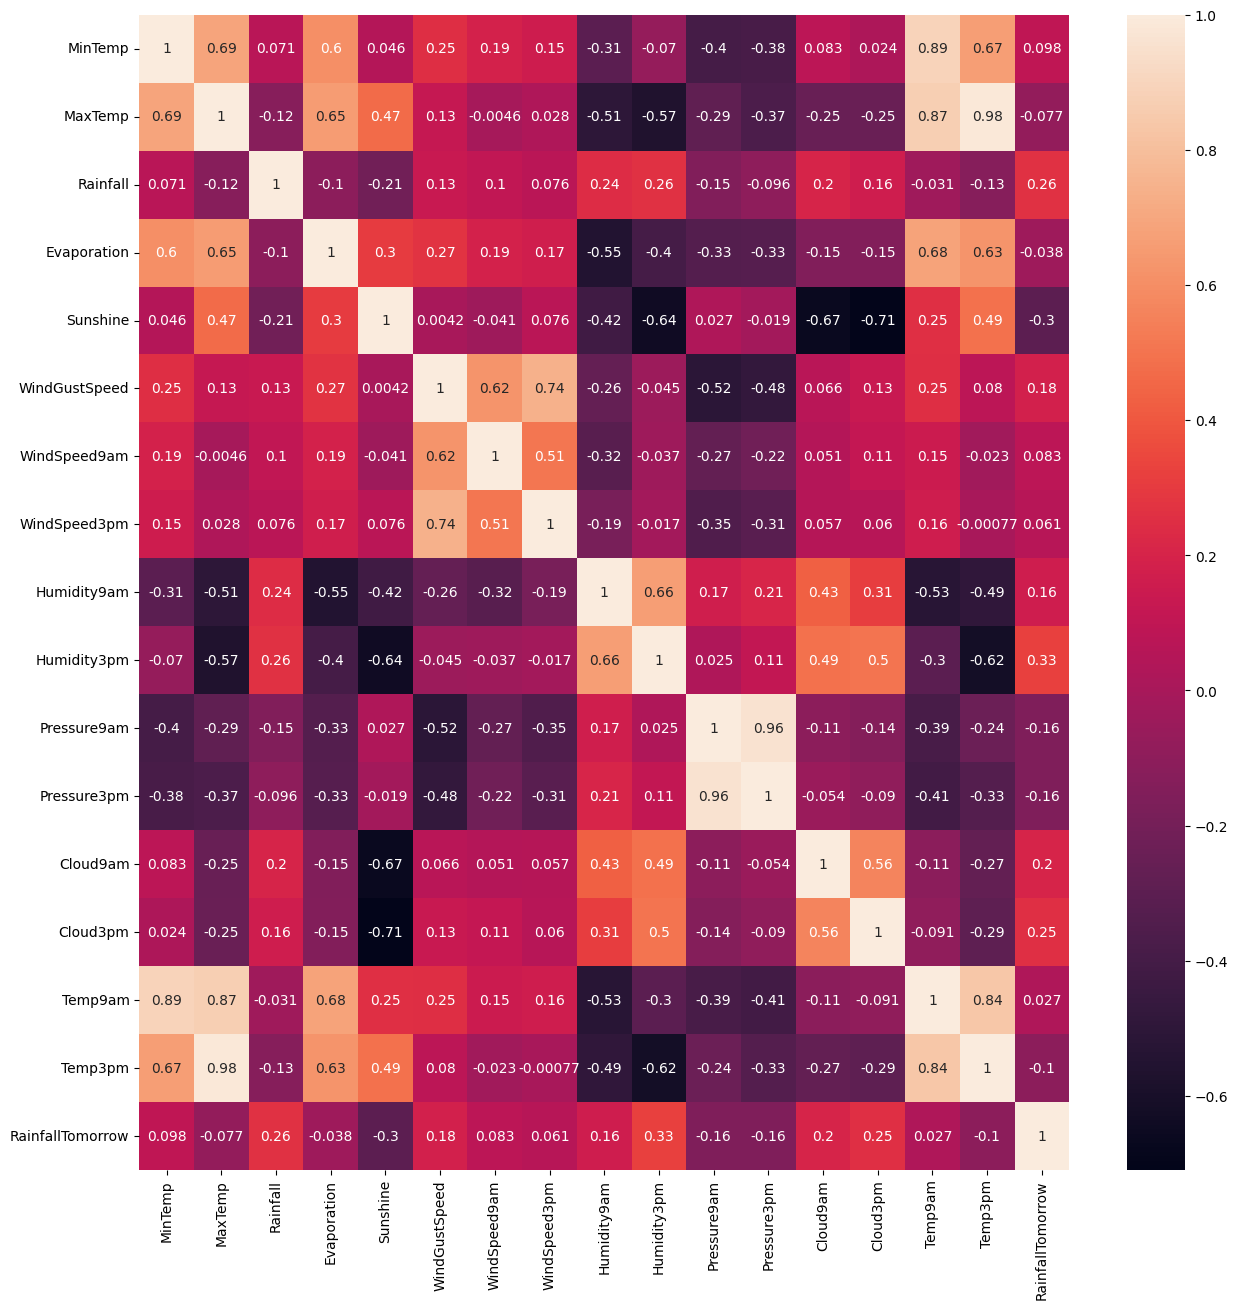

In [1247]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    df_train[
        [
            "MinTemp",
            "MaxTemp",
            "Rainfall",
            "Evaporation",
            "Sunshine",
            "WindGustSpeed",
            "WindSpeed9am",
            "WindSpeed3pm",
            "Humidity9am",
            "Humidity3pm",
            "Pressure9am",
            "Pressure3pm",
            "Cloud9am",
            "Cloud3pm",
            "Temp9am",
            "Temp3pm",
            "RainfallTomorrow",
        ]
    ].corr(),
    annot=True,
)
plt.show()

---

## Imputacion de valores faltantes

### Rainfall

In [1248]:
print(df_train["Rainfall"].isnull().sum())

162


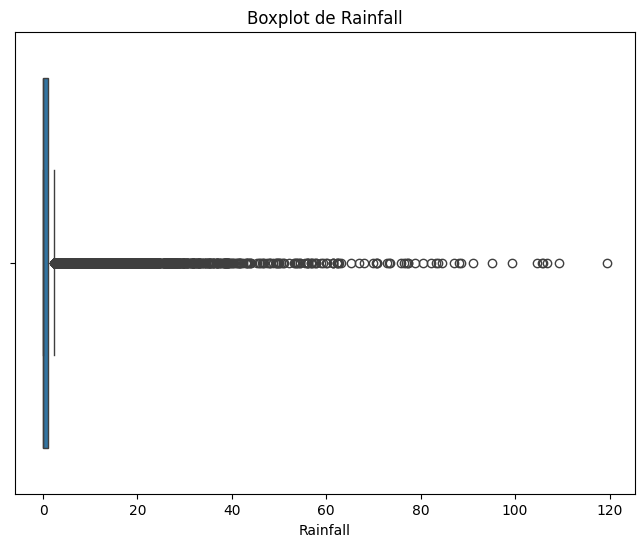

In [1249]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Rainfall", data=df_train)
plt.title("Boxplot de Rainfall")
plt.show()

Veo una gran presencia de valores Outliers por lo que me inclino a usar la Mediana como medida para rellenar los valores nulos de la variable RainFall

In [1250]:
# df_train
mediana_Rainfall_train = df_train.groupby('Date')['Rainfall'].median()
df_train['Rainfall'] = df_train.apply(lambda x: mediana_Rainfall_train[x['Date']] if pd.isnull(x['Rainfall']) else x['Rainfall'], axis=1)

# df_test
mediana_Rainfall_test = df_test.groupby('Date')['Rainfall'].median()
df_test['Rainfall'] = df_test.apply(lambda x: mediana_Rainfall_test[x['Date']] if pd.isnull(x['Rainfall']) else x['Rainfall'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3045500574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Rainfall'] = df_test.apply(lambda x: mediana_Rainfall_test[x['Date']] if pd.isnull(x['Rainfall']) else x['Rainfall'], axis=1)


---

### Evaporation

In [1251]:
print(df_train["Evaporation"].isnull().sum())

1240


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


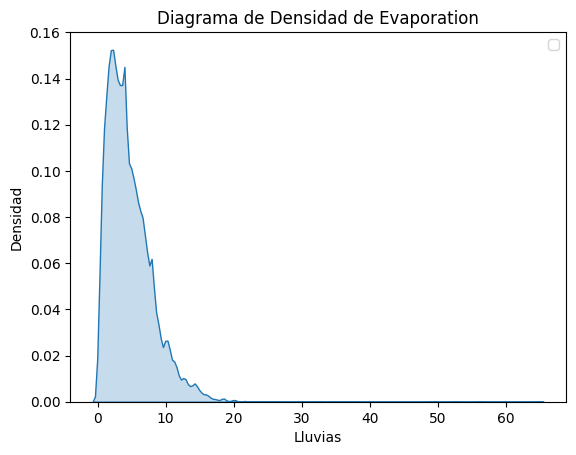

In [1252]:
bandwidth = 0.5
sns.kdeplot(data=df_train['Evaporation'], fill=True, bw_adjust=bandwidth)
plt.title('Diagrama de Densidad de Evaporation')
plt.xlabel('Lluvias')
plt.ylabel('Densidad')
plt.legend()

Nuevamente observo una fuerte presencia de valores outliers por lo que voy a usar la **Mediana** para imputar valores faltantes.

In [1253]:
# df_train
mediana_Evaporation_train = df_train.groupby('Date')['Evaporation'].median()
df_train['Evaporation'] = df_train.apply(lambda x: mediana_Evaporation_train[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)

# df_test
mediana_Evaporation_test = df_test.groupby('Date')['Evaporation'].median()
df_test['Evaporation'] = df_test.apply(lambda x: mediana_Evaporation_test[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\2678679043.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Evaporation'] = df_test.apply(lambda x: mediana_Evaporation_test[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)


---

### Sunshine

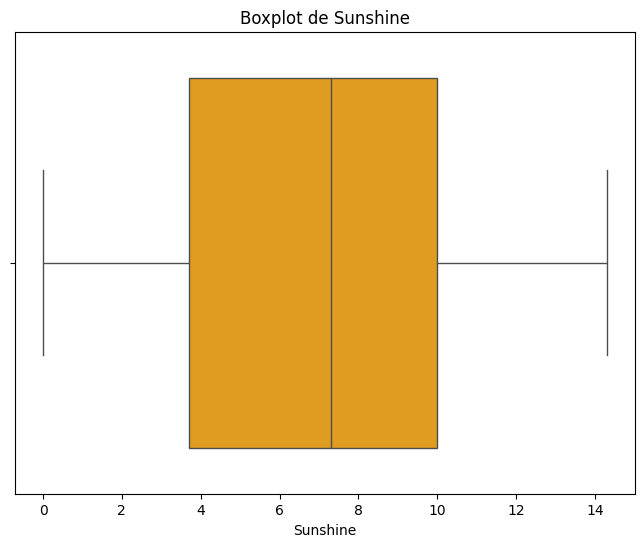

In [1254]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sunshine", data=df_train, color="orange")
plt.title("Boxplot de Sunshine")
plt.show()

La distribucion de la variable Sunshine se ve bastante balanceada y sin presencia de outliers por lo que utilizo la **Media** para imputar a los valores nulos.

In [1255]:
df_train["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(
    lambda x: x.fillna(x.mean())
)
df_test["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\2290878809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(


In [1256]:
# Extraigo el mes de la columna 'Date'
df_train['Month'] = df_train['Date'].dt.month
df_test['Month'] = df_test['Date'].dt.month

# Calcular la media de MinTemp por mes en df_train
media_Sunshine_mes_train = df_train.groupby('Month')['Sunshine'].mean()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\1681817379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Month'] = df_test['Date'].dt.month


In [1257]:
# Imputar los valores nulos de Sunshine de df_test con la media por mes
# Sunshine
df_train['Sunshine'] = df_train['Sunshine'].fillna(df_train['Month'].map(media_Sunshine_mes_train))
df_test['Sunshine'] = df_test['Sunshine'].fillna(df_test['Month'].map(media_Sunshine_mes_train))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\2389355344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Sunshine'] = df_test['Sunshine'].fillna(df_test['Month'].map(media_Sunshine_mes_train))


---

### WindGustDir, WindDir9am y WindDir3pm

In [1258]:
print(df_train["WindGustDir"].isnull().sum())
print(df_train["WindDir9am"].isnull().sum())
print(df_train["WindDir3pm"].isnull().sum())

1482
1149
338


In [1259]:
# Registros donde las 3 variables son Nulas.
df_train[
    df_train["WindGustDir"].isnull()
    & df_train["WindDir9am"].isnull()
    & df_train["WindDir3pm"].isnull()
]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Month
7867,2014-03-25,11.0,27.8,0.0,2.8,6.859300,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,15.8,25.9,No,No,0.0,3
7990,2014-07-26,NaN,NaN,0.0,3.4,6.733883,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,No,No,0.0,7
7991,2014-07-27,NaN,18.9,0.0,4.1,6.682633,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,No,No,0.0,7
7997,2014-08-02,NaN,13.7,0.0,5.4,6.872711,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,No,No,0.0,8
8019,2014-08-24,8.9,22.2,0.0,3.8,6.688376,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,15.2,21.2,No,No,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101491,2014-08-31,9.2,20.0,0.0,3.6,0.500000,NaN,NaN,NaN,NaN,...,1014.1,1009.9,7.0,8.0,13.8,18.5,No,Yes,4.6,8
101526,2014-10-05,8.7,17.8,0.0,6.0,8.900000,NaN,NaN,NaN,NaN,...,1018.3,1015.7,7.0,1.0,12.9,17.1,No,Yes,1.4,10
101553,2014-11-01,8.9,14.4,3.8,10.2,10.400000,NaN,83.0,NaN,NaN,...,1008.4,1013.6,5.0,6.0,12.5,13.6,Yes,Yes,1.2,11
101561,2014-11-09,6.1,20.2,1.2,2.6,11.900000,NaN,NaN,NaN,NaN,...,1025.1,1022.9,5.0,1.0,14.2,19.0,Yes,No,0.0,11


Relleno los valores faltantes para cada variable utilizando la **Moda** de cada dia.

In [1260]:
# df_train
df_train["WindGustDir"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustDir"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir9am"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir3pm"
].transform(lambda x: x.fillna(x.mode().iloc[0]))

# df_test
df_test["WindGustDir"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustDir"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_test["WindDir9am"] = df_test.groupby(df_test["Date"].dt.day)["WindDir9am"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)
df_test["WindDir3pm"] = df_test.groupby(df_test["Date"].dt.day)["WindDir3pm"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\132721561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindGustDir"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\132721561.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindDir9am"] = df_test.groupby(df_test["Date"].dt.day)["WindDir9am"].transform(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\132721561.py:19: SettingWithCopyWarning: 
A value is trying to be set

In [1261]:
print(df_train["WindGustDir"].isnull().sum())
print(df_train["WindDir9am"].isnull().sum())
print(df_train["WindDir3pm"].isnull().sum())

0
0
0


---

### WindGustSpeed, WindSpeed9am y WindSpeed3pm

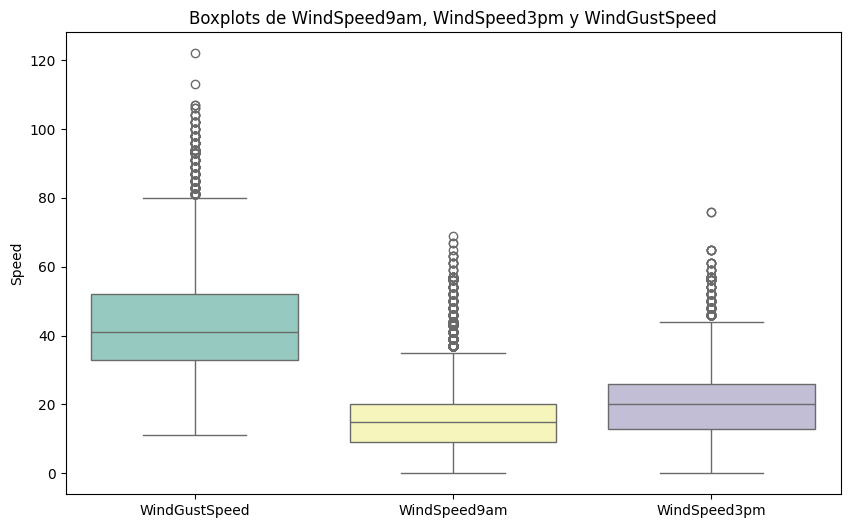

In [1262]:
data_to_plot = df_train[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set3")
plt.title("Boxplots de WindSpeed9am, WindSpeed3pm y WindGustSpeed")
plt.ylabel("Speed")
plt.show()

Voy a imputar los valores nulos utilizando la **Mediana** por dia.

In [1263]:
df_train["WindGustSpeed"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindSpeed9am"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))


df_test["WindGustSpeed"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))
df_test["WindSpeed9am"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindSpeed9am"
].transform(lambda x: x.fillna(x.median()))
df_test["WindSpeed3pm"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3221081509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindGustSpeed"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3221081509.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindSpeed9am"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3221081509.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [1264]:
print(df_train["WindGustSpeed"].isnull().sum())
print(df_train["WindSpeed9am"].isnull().sum())
print(df_train["WindSpeed3pm"].isnull().sum())

0
0
0


---

### Humidity9am, Humidity3pm, Cloud9am, Cloud3pm, Pressure9am y Pressure3pm

In [1265]:
print(df_train["Humidity9am"].isnull().sum())
print(df_train["Humidity3pm"].isnull().sum())
print(df_train["Cloud9am"].isnull().sum())
print(df_train["Cloud3pm"].isnull().sum())
print(df_train["Pressure9am"].isnull().sum())
print(df_train["Pressure3pm"].isnull().sum())

265
222
4267
4527
279
273


#### Humidity9am y Humidity3pm

Imputo los valores de **Humidity9am** y **Humidity3pm** con la mediana por fecha

In [1266]:
# df_train
mediana_Humidity9am = df_train.groupby('Date')['Humidity9am'].median()
df_train['Humidity9am'] = df_train.apply(lambda x: mediana_Humidity9am[x['Date']] if pd.isnull(x['Humidity9am']) else x['Humidity9am'], axis=1)

mediana_Humidity3pm = df_train.groupby('Date')['Humidity3pm'].median()
df_train['Humidity3pm'] = df_train.apply(lambda x: mediana_Humidity3pm[x['Date']] if pd.isnull(x['Humidity3pm']) else x['Humidity3pm'], axis=1)

# df_test
mediana_Humidity9am_test = df_test.groupby('Date')['Humidity9am'].median()
df_test['Humidity9am'] = df_test.apply(lambda x: mediana_Humidity9am_test[x['Date']] if pd.isnull(x['Humidity9am']) else x['Humidity9am'], axis=1)

mediana_Humidity3pm_test = df_test.groupby('Date')['Humidity3pm'].median()
df_test['Humidity3pm'] = df_test.apply(lambda x: mediana_Humidity3pm_test[x['Date']] if pd.isnull(x['Humidity3pm']) else x['Humidity3pm'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\181873114.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Humidity9am'] = df_test.apply(lambda x: mediana_Humidity9am_test[x['Date']] if pd.isnull(x['Humidity9am']) else x['Humidity9am'], axis=1)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\181873114.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Humidity3pm'] = df_test.apply(lambda x: mediana_Humidity3pm_test[x['Date']] if pd.isnull(x['Humidity3pm']) else x['Humidit

In [1267]:
print(df_train["Humidity9am"].isnull().sum())
print(df_train["Humidity3pm"].isnull().sum())

0
0


#### Cloud9am y Cloud3pm

Hago lo mismo con Cloud9am y Cloud3pm, usando las mediana por dia para imputar valores faltantes.

In [1268]:
# df_train
mediana_Cloud9am = df_train.groupby('Date')['Cloud9am'].median()
df_train['Cloud9am'] = df_train.apply(lambda x: mediana_Cloud9am[x['Date']] if pd.isnull(x['Cloud9am']) else x['Cloud9am'], axis=1)

mediana_Cloud3pm = df_train.groupby('Date')['Cloud3pm'].median()
df_train['Cloud3pm'] = df_train.apply(lambda x: mediana_Cloud3pm[x['Date']] if pd.isnull(x['Cloud3pm']) else x['Cloud3pm'], axis=1)

# df_test
mediana_Cloud9am_test = df_test.groupby('Date')['Cloud9am'].median()
df_test['Cloud9am'] = df_test.apply(lambda x: mediana_Cloud9am_test[x['Date']] if pd.isnull(x['Cloud9am']) else x['Cloud9am'], axis=1)

mediana_Cloud3pm_test = df_test.groupby('Date')['Cloud3pm'].median()
df_test['Cloud3pm'] = df_test.apply(lambda x: mediana_Cloud3pm_test[x['Date']] if pd.isnull(x['Cloud3pm']) else x['Cloud3pm'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3635661414.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Cloud9am'] = df_test.apply(lambda x: mediana_Cloud9am_test[x['Date']] if pd.isnull(x['Cloud9am']) else x['Cloud9am'], axis=1)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3635661414.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Cloud3pm'] = df_test.apply(lambda x: mediana_Cloud3pm_test[x['Date']] if pd.isnull(x['Cloud3pm']) else x['Cloud3pm'], axis=1)


In [1269]:
print(df_train["Cloud9am"].isnull().sum())
print(df_train["Cloud3pm"].isnull().sum())

0
0


#### Pressure9am y Pressure3pm

Repito la misma metodologia para las variables Pressure9am y Pressure3pm.

In [1270]:
# df_train
mediana_Pressure9am = df_train.groupby('Date')['Pressure9am'].median()
df_train['Pressure9am'] = df_train.apply(lambda x: mediana_Pressure9am[x['Date']] if pd.isnull(x['Pressure9am']) else x['Pressure9am'], axis=1)

mediana_Pressure3pm = df_train.groupby('Date')['Pressure3pm'].median()
df_train['Pressure3pm'] = df_train.apply(lambda x: mediana_Pressure3pm[x['Date']] if pd.isnull(x['Pressure3pm']) else x['Pressure3pm'], axis=1)

# df_test
mediana_Pressure9am_test = df_test.groupby('Date')['Pressure9am'].median()
df_test['Pressure9am'] = df_test.apply(lambda x: mediana_Pressure9am_test[x['Date']] if pd.isnull(x['Pressure9am']) else x['Pressure9am'], axis=1)

mediana_Pressure3pm_test = df_test.groupby('Date')['Pressure3pm'].median()
df_test['Pressure3pm'] = df_test.apply(lambda x: mediana_Pressure3pm_test[x['Date']] if pd.isnull(x['Pressure3pm']) else x['Pressure3pm'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3146905465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Pressure9am'] = df_test.apply(lambda x: mediana_Pressure9am_test[x['Date']] if pd.isnull(x['Pressure9am']) else x['Pressure9am'], axis=1)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\3146905465.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Pressure3pm'] = df_test.apply(lambda x: mediana_Pressure3pm_test[x['Date']] if pd.isnull(x['Pressure3pm']) else x['Press

In [1271]:
print(df_train["Pressure9am"].isnull().sum())
print(df_train["Pressure3pm"].isnull().sum())

0
0


---

### MinTemp, MaxTemp, Temp9am y Temp3pm

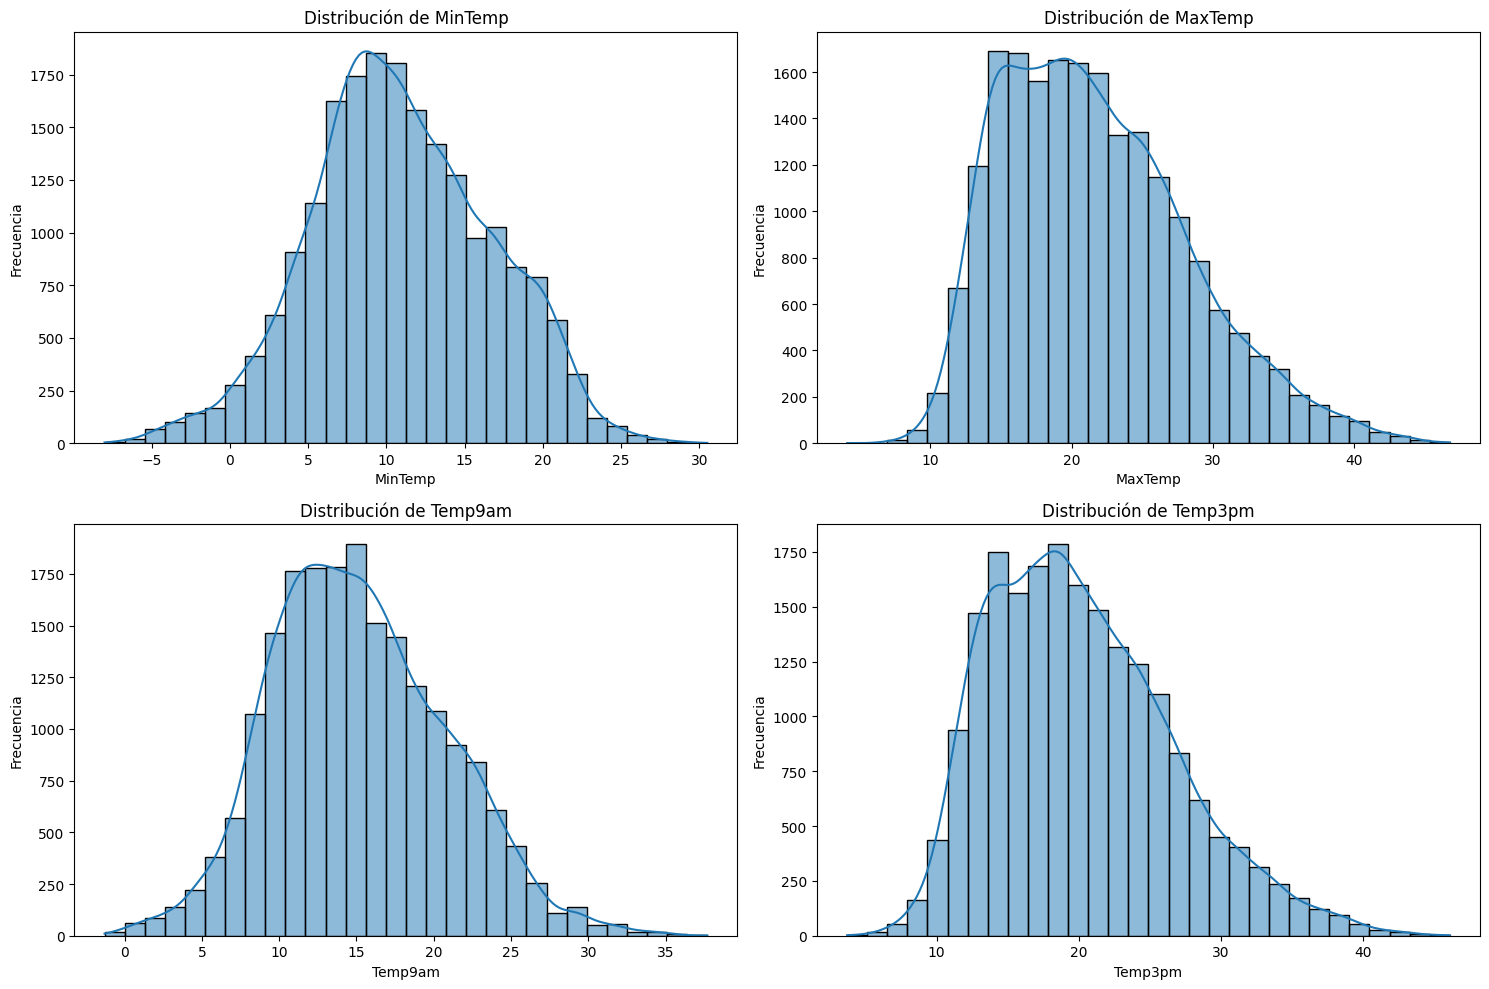

In [1272]:
# Seleccionar algunas columnas para analizar
columns = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

# Crear la figura y los subgráficos
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Observo una distribucion bastante normal en las 4 variables, por lo que en este caso voy a optar por imputar los valores faltantes utilizando la **Media**.

Para eso, voy a calcular la media de cada variable por mes en mi df_train y luego usar estos valores para imputar los valores faltantes tanto en mi df_train como df_test.

In [1273]:
# Extraigo el mes de la columna 'Date'
df_train['Month'] = df_train['Date'].dt.month
df_test['Month'] = df_test['Date'].dt.month

# Calcular la media de MinTemp por mes en df_train
media_MinTemp_mes_train = df_train.groupby('Month')['MinTemp'].mean()
media_MaxTemp_mes_train = df_train.groupby('Month')['MaxTemp'].mean()
media_Temp9am_mes_train = df_train.groupby('Month')['Temp9am'].mean()
media_Temp3pm_mes_train = df_train.groupby('Month')['Temp3pm'].mean()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\530622026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Month'] = df_test['Date'].dt.month


In [1274]:
# Imputar los valores nulos de MinTemp de df_test con la media por mes
# MinTemp
df_train['MinTemp'] = df_train['MinTemp'].fillna(df_train['Month'].map(media_MinTemp_mes_train))
df_test['MinTemp'] = df_test['MinTemp'].fillna(df_test['Month'].map(media_MinTemp_mes_train))

# MaxTemp
df_train['MaxTemp'] = df_train['MaxTemp'].fillna(df_train['Month'].map(media_MaxTemp_mes_train))
df_test['MaxTemp'] = df_test['MaxTemp'].fillna(df_test['Month'].map(media_MaxTemp_mes_train))

# Temp9am
df_train['Temp9am'] = df_train['Temp9am'].fillna(df_train['Month'].map(media_Temp9am_mes_train))
df_test['Temp9am'] = df_test['Temp9am'].fillna(df_test['Month'].map(media_Temp9am_mes_train))

# Temp3pm
df_train['Temp3pm'] = df_train['Temp3pm'].fillna(df_train['Month'].map(media_Temp3pm_mes_train))
df_test['Temp3pm'] = df_test['Temp3pm'].fillna(df_test['Month'].map(media_Temp3pm_mes_train))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\4286069745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MinTemp'] = df_test['MinTemp'].fillna(df_test['Month'].map(media_MinTemp_mes_train))
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\4286069745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MaxTemp'] = df_test['MaxTemp'].fillna(df_test['Month'].map(media_MaxTemp_mes_train))
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\4286069745.py:12: SettingWithCopyWar

In [1275]:
# Elimino la columna 'Month' porque ya no la voy a usar mas
df_train.drop(columns=['Month'], inplace=True)
df_test.drop(columns=['Month'], inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\1517116963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Month'], inplace=True)


---

### RainToday y RainTomorrow

In [1276]:
print(df_train["RainToday"].isna().sum())
print(df_train["RainTomorrow"].isna().sum())
print(df_train["RainfallTomorrow"].isna().sum())

162
0
0


Imputo los valores de RainToday con la moda porque es una variable categorica.

In [1277]:
# df_train
moda_RainToday_train = df_train.groupby("Date")["RainToday"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_train["RainToday"] = df_train["RainToday"].fillna(moda_RainToday_train)

moda_RainToday_test = df_test.groupby("Date")["RainToday"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainToday"] = df_test["RainToday"].fillna(moda_RainToday_test)

# df_test
moda_RainTomorrow_test = df_test.groupby("Date")["RainTomorrow"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainTomorrow"] = df_test["RainTomorrow"].fillna(moda_RainTomorrow_test)

moda_RainfallTomorrow_test = df_test.groupby("Date")["RainfallTomorrow"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainfallTomorrow"] = df_test["RainfallTomorrow"].fillna(
    moda_RainfallTomorrow_test
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\1132428338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainToday"] = df_test["RainToday"].fillna(moda_RainToday_test)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\1132428338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainTomorrow"] = df_test["RainTomorrow"].fillna(moda_RainTomorrow_test)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_34424\1132428338.py:21: SettingWithCopyWarning: 
A value is trying to be se

---

### Comprobacion final

In [1278]:
df_train.isna().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

In [1279]:
df_test.isna().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

# Escalado de Datos

In [1280]:
columnas_categoricas = ['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [1281]:
columnas_numericas = df_train.columns.difference(columnas_categoricas)
df_train_numeric = df_train[columnas_numericas]
df_test_numeric = df_test[columnas_numericas]

In [1282]:
scaler = StandardScaler()

# Ajustar el escalador solo con los datos numéricos de entrenamiento
scaler.fit(df_train_numeric)

# Escalo df_train
df_train_escalado_numeric = scaler.transform(df_train_numeric)
df_train_esc = pd.DataFrame(df_train_escalado_numeric, columns=columnas_numericas, index=df_train.index)

# Escalo df_test
df_test_escalado_numeric = scaler.transform(df_test_numeric)
df_test_esc = pd.DataFrame(df_test_escalado_numeric, columns=columnas_numericas, index=df_test.index)

# Uno las columnas categóricas con los df escalados
df_train_escalado = df_train[columnas_categoricas].join(df_train_esc)
df_test_escalado = df_test[columnas_categoricas].join(df_test_esc)

---

# Dummies

### RainToday y RainTomorrow

La columna 'RainToday' y 'RainTomorrow' tienen valores 'Yes' 'No' por lo que los mapeo a 1 para 'Yes' y 0 para 'No'.

In [1283]:
# df_train
df_train_escalado["RainToday"] = df_train_escalado["RainToday"].map({"Yes": 1, "No": 0})
df_train_escalado["RainTomorrow"] = df_train_escalado["RainTomorrow"].map({"Yes": 1, "No": 0})
# df_test
df_test_escalado["RainToday"] = df_test_escalado["RainToday"].map({"Yes": 1, "No": 0})
df_test_escalado["RainTomorrow"] = df_test_escalado["RainTomorrow"].map({"Yes": 1, "No": 0})

### WindGustDir, WindDir9am y WindDir3pm

Agrupo los valores de la variables categoricas de Direccion, que tiene los siguientes valores:

['SSW', 'S', 'SE', 'NNE', 'WNW', 'N', 'ENE', 'NE', 'E', 'SW', 'W', 'WSW', 'NNW', 'ESE', 'SSE', 'NW']

El criterio que empleo es asignar a cada punto cardenal el predominante, por ejemplo 'NNW' lo asigno a 'N'

Para los valores como, por ejemplo 'NE' o 'SW' los asigno al ultimo punto cardinal de la notacion.

In [1284]:
def agrupar_direcciones(direccion):
    grupos_principales = {
        "N": ["N", "NNW", "NNE"],
        "S": ["S", "SSW", "SSE"],
        "E": ["E", "ENE", "ESE", "SE", "NE"],
        "W": ["W", "WNW", "WSW", "SW", "NW"],
    }

    for grupo, direcciones in grupos_principales.items():
        if direccion in direcciones:
            return grupo

    return "Otro"

In [1285]:
df_train_escalado["WindGustDir_Agrupado"] = df_train_escalado["WindGustDir"].apply(agrupar_direcciones)
df_train_escalado["WindDir9am_Agrupado"] = df_train_escalado["WindDir9am"].apply(agrupar_direcciones)
df_train_escalado["WindDir3pm_Agrupado"] = df_train_escalado["WindDir3pm"].apply(agrupar_direcciones)

df_test_escalado["WindGustDir_Agrupado"] = df_test_escalado["WindGustDir"].apply(agrupar_direcciones)
df_test_escalado["WindDir9am_Agrupado"] = df_test_escalado["WindDir9am"].apply(agrupar_direcciones)
df_test_escalado["WindDir3pm_Agrupado"] = df_test_escalado["WindDir3pm"].apply(agrupar_direcciones)


df_train_escalado = df_train_escalado.drop("WindGustDir", axis=1)
df_train_escalado = df_train_escalado.drop("WindDir9am", axis=1)
df_train_escalado = df_train_escalado.drop("WindDir3pm", axis=1)

df_test_escalado = df_test_escalado.drop("WindGustDir", axis=1)
df_test_escalado = df_test_escalado.drop("WindDir9am", axis=1)
df_test_escalado = df_test_escalado.drop("WindDir3pm", axis=1)

In [1286]:
df_train_escalado.to_csv('df_train_escalado.csv', index=False)
df_test_escalado.to_csv('df_test_escalado.csv', index=False)

##### WindGustDir

In [1287]:
# df_train_escalado
d_WindGustDir_train = pd.get_dummies(
    df_train_escalado["WindGustDir_Agrupado"], dtype=int, drop_first=True
)

d_WindGustDir_train = d_WindGustDir_train.rename(
    columns={"N": "WindGustDir_N", "S": "WindGustDir_S", "W": "WindGustDir_W"}
)
df_train_escalado = df_train_escalado.drop("WindGustDir_Agrupado", axis=1)
df_train_escalado = pd.concat([df_train_escalado, d_WindGustDir_train], axis=1)

# df_test_escalado
d_WindGustDir_test = pd.get_dummies(
    df_test_escalado["WindGustDir_Agrupado"], dtype=int, drop_first=True
)

d_WindGustDir_test = d_WindGustDir_test.rename(
    columns={"N": "WindGustDir_N", "S": "WindGustDir_S", "W": "WindGustDir_W"}
)
df_test_escalado = df_test_escalado.drop("WindGustDir_Agrupado", axis=1)
df_test_escalado = pd.concat([df_test_escalado, d_WindGustDir_test], axis=1)

##### WindDir9am

In [1288]:
d_WindDir9am_train = pd.get_dummies(
    df_train_escalado["WindDir9am_Agrupado"], dtype=int, drop_first=True
)
d_WindDir9am_train = d_WindDir9am_train.rename(
    columns={"N": "WindDir9am_N", "S": "WindDir9am_S", "W": "WindDir9am_W"}
)
df_train_escalado = df_train_escalado.drop("WindDir9am_Agrupado", axis=1)
df_train_escalado = pd.concat([df_train_escalado, d_WindDir9am_train], axis=1)


d_WindDir9am_test = pd.get_dummies(
    df_test_escalado["WindDir9am_Agrupado"], dtype=int, drop_first=True
)
d_WindDir9am_test = d_WindDir9am_test.rename(
    columns={"N": "WindDir9am_N", "S": "WindDir9am_S", "W": "WindDir9am_W"}
)
df_test_escalado = df_test_escalado.drop("WindDir9am_Agrupado", axis=1)
df_test_escalado = pd.concat([df_test_escalado, d_WindDir9am_test], axis=1)

##### WindDir3pm

In [1289]:
d_WindDir3pm_train = pd.get_dummies(
    df_train_escalado["WindDir3pm_Agrupado"], dtype=int, drop_first=True
)
d_WindDir3pm_train = d_WindDir3pm_train.rename(
    columns={"N": "WindDir3pm_N", "S": "WindDir3pm_S", "W": "WindDir3pm_W"}
)
df_train_escalado = df_train_escalado.drop("WindDir3pm_Agrupado", axis=1)
df_train_escalado = pd.concat([df_train_escalado, d_WindDir3pm_train], axis=1)


d_WindDir3pm_test = pd.get_dummies(
    df_test_escalado["WindDir3pm_Agrupado"], dtype=int, drop_first=True
)
d_WindDir3pm_test = d_WindDir3pm_test.rename(
    columns={"N": "WindDir3pm_N", "S": "WindDir3pm_S", "W": "WindDir3pm_W"}
)
df_test_escalado = df_test_escalado.drop("WindDir3pm_Agrupado", axis=1)
df_test_escalado = pd.concat([df_test_escalado, d_WindDir3pm_test], axis=1)

# Exportar

In [1290]:
df_train_escalado.to_csv('df_train_escalado.csv', index=False)
df_test_escalado.to_csv('df_test_escalado.csv', index=False)

In [1291]:
df_train_escalado

,Date,RainToday,RainTomorrow,Cloud3pm,Cloud9am,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,...,WindSpeed9am,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
6047,2009-01-01,0,0,0.132441,-0.943939,2.175954,-1.894253,-2.699634,2.055898,1.207203,...,-1.022664,0,1,0,0,0,0,0,0,1
6048,2009-01-02,0,0,-1.449213,-1.312175,3.006553,-2.144408,-2.156725,1.098473,1.294043,...,0.326475,0,1,0,0,1,0,0,1,0
6049,2009-01-03,0,0,-1.449213,0.897239,2.353939,-2.194439,-0.826599,1.888729,0.790367,...,-0.088645,0,0,0,1,0,0,1,0,0
6050,2009-01-04,0,0,0.527854,-1.312175,1.819983,-1.443974,-1.505235,2.420631,1.467725,...,1.468053,1,0,0,1,0,0,1,0,0
6051,2009-01-05,0,0,0.132441,-1.312175,1.997969,-1.443974,-1.776689,2.542209,1.901928,...,-1.022664,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,2015-12-27,0,0,0.527854,0.160768,-0.019200,-0.593446,-1.070908,0.049865,-0.842237,...,-0.088645,0,1,0,0,1,0,0,1,0
101975,2015-12-28,0,0,-1.844626,-1.312175,0.277443,-0.593446,-0.908036,0.551373,-0.685924,...,0.118915,0,1,0,0,0,0,0,1,0
101976,2015-12-29,0,0,-1.844626,-1.680411,0.574085,-1.293881,-1.016617,1.463206,-0.477506,...,-0.088645,0,0,1,0,0,0,0,1,0
101977,2015-12-30,0,0,0.527854,0.529004,0.040129,-2.044346,-2.265307,2.496618,-0.338561,...,0.637814,0,0,1,1,0,0,0,0,1


In [1292]:
df_test_escalado

,Date,RainToday,RainTomorrow,Cloud3pm,Cloud9am,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,...,WindSpeed9am,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
8514,2016-01-01,0,0,-1.449213,0.713122,2.413268,-1.894253,-2.536761,2.238265,2.353499,...,0.430255,0,1,0,0,0,0,0,1,0
8515,2016-01-02,0,0,0.923268,0.897239,5.439021,-1.494005,-2.319598,1.721559,2.700862,...,0.326475,0,0,1,0,0,1,0,0,1
8516,2016-01-03,0,0,0.923268,0.529004,0.396100,-0.543415,-1.016617,1.235248,1.971400,...,0.430255,0,0,0,1,0,0,0,0,0
8517,2016-01-04,0,0,0.923268,-1.312175,1.464012,-0.193198,-0.582291,0.992093,0.929312,...,0.326475,0,0,0,0,0,0,0,1,0
8518,2016-01-05,0,0,-0.262972,-0.943939,0.099457,-0.393322,-0.419418,1.372023,1.398252,...,-0.711324,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,2017-06-20,0,1,-0.262972,0.529004,-0.701477,0.957515,1.046435,-0.816377,-0.824869,...,0.845374,1,0,0,1,0,0,0,0,1
102516,2017-06-21,1,0,1.318681,-0.943939,-0.998120,1.557888,1.535053,-1.287491,-0.390665,...,-1.645343,0,1,0,1,0,0,0,0,0
102517,2017-06-22,0,0,-1.053799,1.265475,-0.998120,0.807422,1.209308,-0.907560,-0.685924,...,-0.296205,1,0,0,1,0,0,1,0,0
102518,2017-06-23,0,1,-0.262972,1.265475,-0.790470,0.957515,1.100726,-0.831574,-0.963814,...,0.845374,1,0,0,1,0,0,0,0,1


# Split

In [1293]:
X_train = df_train_escalado.drop(columns=['Date', 'RainfallTomorrow', 'RainTomorrow'])
y_train = df_train_escalado['RainfallTomorrow']

X_test = df_test_escalado.drop(columns=['Date', 'RainfallTomorrow', 'RainTomorrow'])
y_test = df_test_escalado['RainfallTomorrow']

# Regresion Lineal

In [1294]:
# Crear y entrenar el modelo de regresión lineal
rl_model = LinearRegression()
rl_model.fit(X_train, y_train)

# Train
y_pred_train = rl_model.predict(X_train)

# Test
y_pred_test = rl_model.predict(X_test)

In [1295]:
# MSE
mset = mean_squared_error(y_train, y_pred_train)
mse_lr = mean_squared_error(y_test, y_pred_test)
print("MSE train:", mset)
print("MSE test:", mse_lr)

# MAE
maet = mean_absolute_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE train:", maet)
print("MAE test:", mae)

# R^2
r2t = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred_test)
print("R^2 Score train:", r2t)
print("R^2 Score test:", r2)

MSE train: 0.7837431498715978
MSE test: 0.9324998171850354
MAE train: 0.42291368336267615
MAE test: 0.4456293230595452
R^2 Score train: 0.21625685012840223
R^2 Score test: 0.22085306599840682


MSE: El MSE de test es apenas superior que el de train, lo que indica que el modelo rinde un poco mejor con los datos de entrenamiento, pero la diferencia no es significativa, se puede decir que el modelo generaliza bastante bien a nuevos datos.

Un R² de aproximadamente 0.35 para ambos conjuntos indica que el modelo solo explica alrededor del 35% de la variabilidad en los datos lo que indica que el modelo no captura bien la relación entre las variables predictoras y la variable objetivo.
Dado que los valores de R² son similares en los conjuntos de train y test, no considero que haya sobreajuste, pero igualmente el modelo no es muy preciso.

### Optimizacion de Hiperparametros

In [1296]:
# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'fit_intercept': [False, True],
    'copy_X': [True, False]
}
# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)

# Realizar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': False}


In [1297]:
rl_model_opt = LinearRegression(fit_intercept=True, copy_X=True)

rl_model_opt.fit(X_train, y_train)

# Train
y_pred_train_opt = rl_model_opt.predict(X_train)

# Test
y_pred_test_opt = rl_model_opt.predict(X_test)

In [1298]:
# Calculamos MSE
mset = mean_squared_error(y_train, y_pred_train_opt)
mse_lr = mean_squared_error(y_test, y_pred_test_opt)
print("MSE train:", mset)
print("MSE test:", mse_lr)

# Calcular MAE
maet = mean_absolute_error(y_train, y_pred_train_opt)
mae = mean_absolute_error(y_test, y_pred_test_opt)
print("MAE train:", maet)
print("MAE test:", mae)

# Calcular R^2
r2t = r2_score(y_train, y_pred_train_opt)
r2 = r2_score(y_test, y_pred_test_opt)
print("R^2 Score train:", r2t)
print("R^2 Score test:", r2)

MSE train: 0.7837431498715978
MSE test: 0.9324998171850354
MAE train: 0.42291368336267615
MAE test: 0.4456293230595452
R^2 Score train: 0.21625685012840223
R^2 Score test: 0.22085306599840682


El ajuste de hiperparámetros no mejoró el rendimiento del modelo. Las métricas que obtuve (MSE, MAE y el R²) son idénticas para ambos modelos.

# Regresion Logistica

### Split de datos

In [1299]:
X_train_rl = df_train_escalado.drop(columns=['Date', 'RainTomorrow', 'RainfallTomorrow'])
y_train_rl = df_train_escalado['RainTomorrow']

X_test_rl = df_test_escalado.drop(columns=['Date', 'RainTomorrow', 'RainfallTomorrow'])
y_test_rl = df_test_escalado['RainTomorrow']

In [1300]:
X_train_rl

,RainToday,Cloud3pm,Cloud9am,Evaporation,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Pressure3pm,Pressure9am,...,WindSpeed9am,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
6047,0,0.132441,-0.943939,2.175954,-1.894253,-2.699634,2.055898,1.207203,-1.629595,-1.630482,...,-1.022664,0,1,0,0,0,0,0,0,1
6048,0,-1.449213,-1.312175,3.006553,-2.144408,-2.156725,1.098473,1.294043,-0.564326,-0.734201,...,0.326475,0,1,0,0,1,0,0,1,0
6049,0,-1.449213,0.897239,2.353939,-2.194439,-0.826599,1.888729,0.790367,-0.633499,0.358991,...,-0.088645,0,0,0,1,0,0,1,0,0
6050,0,0.527854,-1.312175,1.819983,-1.443974,-1.505235,2.420631,1.467725,-0.965531,-0.815681,...,1.468053,1,0,0,1,0,0,1,0,0
6051,0,0.132441,-1.312175,1.997969,-1.443974,-1.776689,2.542209,1.901928,-0.979366,-0.761361,...,-1.022664,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101974,0,0.527854,0.160768,-0.019200,-0.593446,-1.070908,0.049865,-0.842237,1.220346,0.841082,...,-0.088645,0,1,0,0,1,0,0,1,0
101975,0,-1.844626,-1.312175,0.277443,-0.593446,-0.908036,0.551373,-0.685924,1.095834,1.126262,...,0.118915,0,1,0,0,0,0,0,1,0
101976,0,-1.844626,-1.680411,0.574085,-1.293881,-1.016617,1.463206,-0.477506,0.445605,0.623802,...,-0.088645,0,0,1,0,0,0,0,1,0
101977,0,0.527854,0.529004,0.040129,-2.044346,-2.265307,2.496618,-0.338561,-0.661168,-0.476180,...,0.637814,0,0,1,1,0,0,0,0,1


### Modelo

In [1301]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_rl, y_train_rl)

y_pred_train_rl = logistic_model.predict(X_train_rl)
y_pred_test_rl = logistic_model.predict(X_test_rl)

Resultados con regresión logística en el conjunto de entrenamiento

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15242
           1       0.73      0.53      0.61      4739

    accuracy                           0.84     19981
   macro avg       0.80      0.73      0.76     19981
weighted avg       0.83      0.84      0.83     19981

accuracy balanceado: 0.7339054836179026
Perdida logarítmica: 5.693096946902244
F1-Score: 0.571262361838278
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Resultados con regresión logística en el conjunto de test

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3271
           1       0.74      0.46      0.57      1057

    accuracy                           0.83      4328
   ma

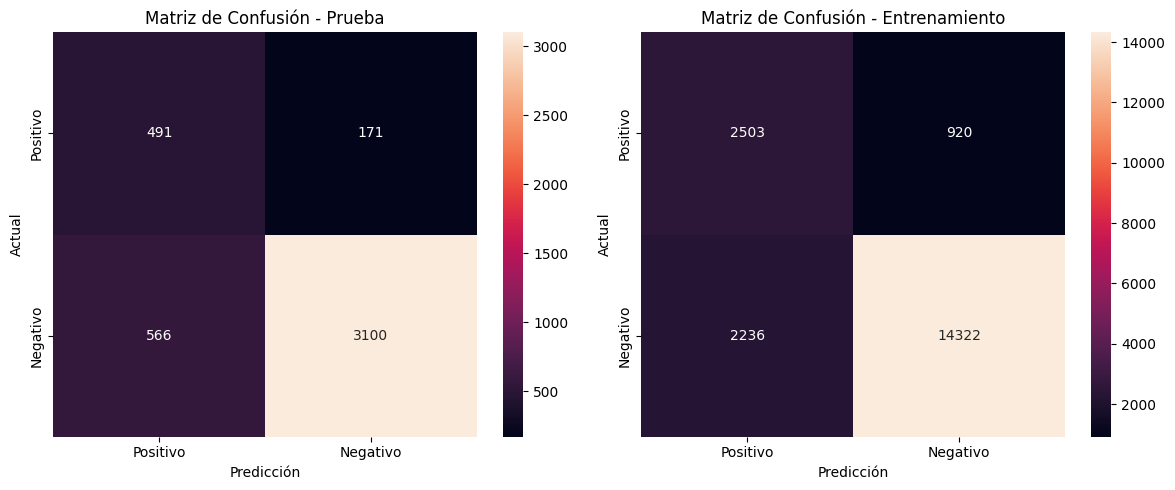

In [1398]:
print("Resultados con regresión logística en el conjunto de entrenamiento\n")
print(classification_report(y_train_rl, y_pred_train_rl))
balanced_accuracy_train = balanced_accuracy_score(y_train_rl, y_pred_train_rl)
print("accuracy balanceado:", balanced_accuracy_train)
loss_train = log_loss(y_train_rl, y_pred_train_rl)
print("Perdida logarítmica:", loss_train)
f1_train = f1_score(y_test_rl, y_pred_test_rl)
print("F1-Score:", f1_train)
print("-----------------------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------")
print("Resultados con regresión logística en el conjunto de test\n")
print(classification_report(y_test_rl, y_pred_test_rl))
balanced_accuracy_test = balanced_accuracy_score(y_test_rl, y_pred_test_rl)
print("accuracy balanceado:", balanced_accuracy_test)
loss_test = log_loss(y_test_rl, y_pred_test_rl)
print("Perdida logarítmica:", loss_test)
f1_test = f1_score(y_test_rl, y_pred_test_rl)
print("F1-Score:", f1_test)

print("-----------------------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------")

# conf_matrix_train = confusion_matrix(y_train_rl, y_pred_train_rl)
# Matriz de confusion TRAIN
tnT, fpT, fnT, tpT = confusion_matrix(y_train_rl, y_pred_train_rl).ravel()
confusion_mat_train = [[tpT, fpT],[fnT, tnT]]
df_cm_train = pd.DataFrame(confusion_mat_train, index=['Positivo', 'Negativo'],
                     columns=['Positivo', 'Negativo'])
# Matriz de confusion TEST
tn, fp, fn, tp = confusion_matrix(y_test_rl, y_pred_test_rl).ravel()
confusion_mat_test = [[tp, fp],[fn, tn]]
df_cm_test = pd.DataFrame(confusion_mat_test, index=['Positivo', 'Negativo'],
                     columns=['Positivo', 'Negativo'])
# conf_matrix_test = confusion_matrix(y_test_rl, y_pred_test_rl)


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 5))

# Matriz de confusión para el conjunto de prueba
plt.subplot(1, 2, 1)
# sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
sns.heatmap(df_cm_test, annot=True, fmt='d')
plt.title('Matriz de Confusión - Prueba')
plt.xlabel('Predicción')
plt.ylabel('Actual')

# Matriz de confusión para el conjunto de entrenamiento
plt.subplot(1, 2, 2)
# sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
sns.heatmap(df_cm_train, annot=True, fmt='d')
plt.title('Matriz de Confusión - Entrenamiento')
plt.xlabel('Predicción')
plt.ylabel('Actual')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Curva ROC

In [1303]:
# Obtengo las probabilidades de predicción del modelo para los datos de entrenamiento y prueba
y_probs_train = logistic_model.predict_proba(X_train_rl)[:, 1]
y_probs_test = logistic_model.predict_proba(X_test_rl)[:, 1]

# Calculo la ROC y el AUC para los datos de entrenamiento y prueba
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_rl, y_probs_train, pos_label= 1)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_rl, y_probs_test, pos_label= 1)
roc_auc_test = auc(fpr_test, tpr_test)

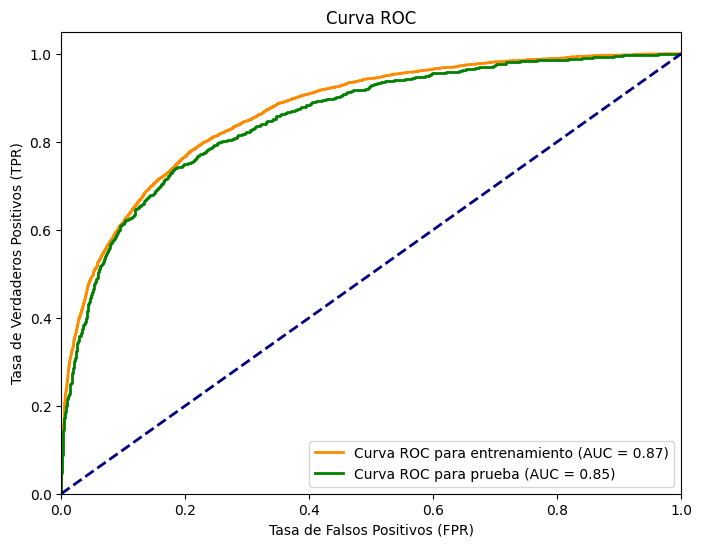

El área bajo la curva para entrenamiento es de: 0.868398572385767
El área bajo la curva para test es de: 0.8536631219509655


In [1304]:
# Grafico la curva ROC para los datos de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Curva ROC para entrenamiento (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Curva ROC para prueba (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"El área bajo la curva para entrenamiento es de: {roc_auc_train}")
print(f"El área bajo la curva para test es de: {roc_auc_test}")

# Redes Neuronales

In [1305]:
import pandas as pd
import numpy as np
import tensorflow as tf
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### RainfallTomorrow

In [1306]:
class NeuralNetworkTensorFlow:
    """
        Este es un modelo simple con TensorFlow para resolver el mismo problema. 
        En esta clase, (1) se construye el modelo.
        (2) Se define como se fitea el modelo
        (3) Y como se hacen las predicciones.
    """
    def __init__(self):
        self.model = self.build_model()

    def build_model(self):
        """
            Construye el modelo
            Para construir el modelo es necesario una arquitectura, un optimizador y una función de pérdida.
            La arquitectura se construye con el método Sequential, que basicamente lo que hace es colocar 
            secuencialmente las capas que uno desea.
            Las capas "Dense" son las fully connected dadas en clase.
            Se agrega una capa oculta que recibe un input de tamaño 2,
            y una capa de salida de regresión (una única neurona)
            En todos los casos se define una sigmoidea como función de activación (prueben otras!)

            El optimizador y la función de pérdida se especifican dentro de un compilador.

            Con este método, lo que se devuelve es el modelo sin entrenar, sería equivalente a escribir LinearRegression() 
            en el caso de la regresión lineal.
        """

        model = tf.keras.Sequential([
            tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(26,)),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        ### imprimimos la cantidad de parámetros a modo de ejemplo
        print("n° de parámetros:", model.count_params())
        return model
    
        # #input_shape=(self.valor1,self.valor2)
        # model = tf.keras.Sequential()
        # model.add(Input(shape=(21,)))
        # model.add(Dense(2, activation='sigmoid'))
        # model.add(Dense(1, activation='sigmoid'))
        # model.compile(optimizer='adam', loss='mean_squared_error')
        # ### imprimimos la cantidad de parámetros a modo de ejemplo
        # print("n° de parámetros:", model.count_params())
        # return model
    
    def fit(self, X, y, lr=0.1, epochs=200):
        ### esta es la función donde se entrena el modelo, fijarse que hay un learning rate e iteraciones.
        ### la función que fitea devuelve una historia de pérdida, que vamos a guardar para graficar la evolución.
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=epochs, verbose=0)
        return history.history['loss']

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions

In [1307]:
# Crear y entrenar el modelo
nn_model = NeuralNetworkTensorFlow()
train_loss_history = nn_model.fit(X_train, y_train, epochs=100)

# Realizar predicciones en ambos conjuntos
y_pred_train = nn_model.predict(X_train)
y_pred_test = nn_model.predict(X_test)

c:\Users\Francisco\Desktop\AA1-TUIA-RodriguezYBarros\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


n° de parámetros: 57
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


In [1308]:
# Calcular el MSE para entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Imprimir los resultados
print(f"MSE en el conjunto de entrenamiento: {mse_train}")
print(f"MSE en el conjunto de prueba: {mse_test}")

MSE en el conjunto de entrenamiento: 0.8191218891820585
MSE en el conjunto de prueba: 1.0021575300144538


##### Optimizacion de Hiperparametros con Optuna

In [ ]:
def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    model = Sequential()

    # Crear las capas ocultas
    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 1, 32)
        model.add(Dense(num_units, activation='relu'))

    # Capa de salida para regresión
    model.add(Dense(1, activation='linear'))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    # Sugerir el número de epochs como hiperparámetro
    epochs = trial.suggest_int('epochs', 5, 50)

    # Entrenar el modelo
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=0)

    # Evaluar el modelo y obtener el MSE
    mse = model.evaluate(X_test, y_test, verbose=0)[0]
    
    # Devuelve el MSE como métrica para minimizar
    return mse

In [ ]:
# Crear un estudio de Optuna para minimizar el MSE
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Mejores parámetros encontrados:", best_params)

Mejores parámetros encontrados: {'num_layers': 1, 'n_units_layer_0': 30, 'epochs': 34}

In [1309]:
# Definir el modelo con los mejores hiperparámetros
nn_model_opt = Sequential()

# Añadir la capa oculta con 30 unidades y activación 'relu'
nn_model_opt.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
# Añadir la capa de salida para regresión con activación 'linear'
nn_model_opt.add(Dense(1, activation='linear'))

nn_model_opt.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

nn_model_opt.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=34, batch_size=32, verbose=1)

mse_train = nn_model_opt.evaluate(X_train, y_train, verbose=0)[0]
mse_test = nn_model_opt.evaluate(X_test, y_test, verbose=0)[0]

# Mostrar los resultados
print(f"MSE en el conjunto de entrenamiento: {mse_train}")
print(f"MSE en el conjunto de prueba: {mse_test}")

Epoch 1/34


c:\Users\Francisco\Desktop\AA1-TUIA-RodriguezYBarros\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9556 - mse: 0.9556 - val_loss: 0.9279 - val_mse: 0.9279
Epoch 2/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 0.7619 - mse: 0.7619 - val_loss: 0.8784 - val_mse: 0.8784
Epoch 3/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 0.7895 - mse: 0.7895 - val_loss: 0.8607 - val_mse: 0.8607
Epoch 4/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - loss: 0.7288 - mse: 0.7288 - val_loss: 0.8445 - val_mse: 0.8445
Epoch 5/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6873 - mse: 0.6873 - val_loss: 0.8544 - val_mse: 0.8544
Epoch 6/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6480 - mse: 0.6480 - val_loss: 0.8347 - val_mse: 0.8347
Epoch 7/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 0.7027 - mse: 0.7027 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 8/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.7229 - mse: 0.7229 - val_loss: 0.8118 - val_mse: 0.8118
Epoch 9/34
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - l

##### Explicabilidad Local

In [1312]:
import shap

In [1314]:
# Crea un objeto explainer SHAP
feature_names = X_train.columns.values
feature_names

# Crear un conjunto de muestras de fondo
background = X_train.sample(100) 

explainer = shap.KernelExplainer(nn_model_opt, background)

instance_to_explain = X_test.iloc[0:1].values  # Seleccionar la línea 0

# Calcular los valores SHAP para los datos de prueba
shap_values = explainer.shap_values(instance_to_explain)

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


In [1316]:
shap_values = shap_values.reshape(26,)
shap_values

array([-0.01876771, -0.060607  , -0.02013283,  0.        , -0.27023422,
       -0.00713666, -0.29522245, -0.09274153,  0.20945354, -0.10048899,
        0.01344508, -0.02728056,  0.19870093,  0.09340365,  0.10696114,
       -0.12111718,  0.00858543, -0.00874007,  0.01632832, -0.03533913,
       -0.00753311,  0.01479053, -0.0088347 , -0.01244559, -0.01485637,
       -0.01269817])

In [1317]:
# Obtener el valor esperado (base value)
expected_value = explainer.expected_value

# Hacer predicciones
index = 0  # índice de la instancia que queremos explicar
predicted_proba = nn_model_opt.predict(X_test)[index]  # Predicción de probabilidad
predicted_class = np.argmax(predicted_proba)  # Clase predicha

shap_values[index]
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=feature_names)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


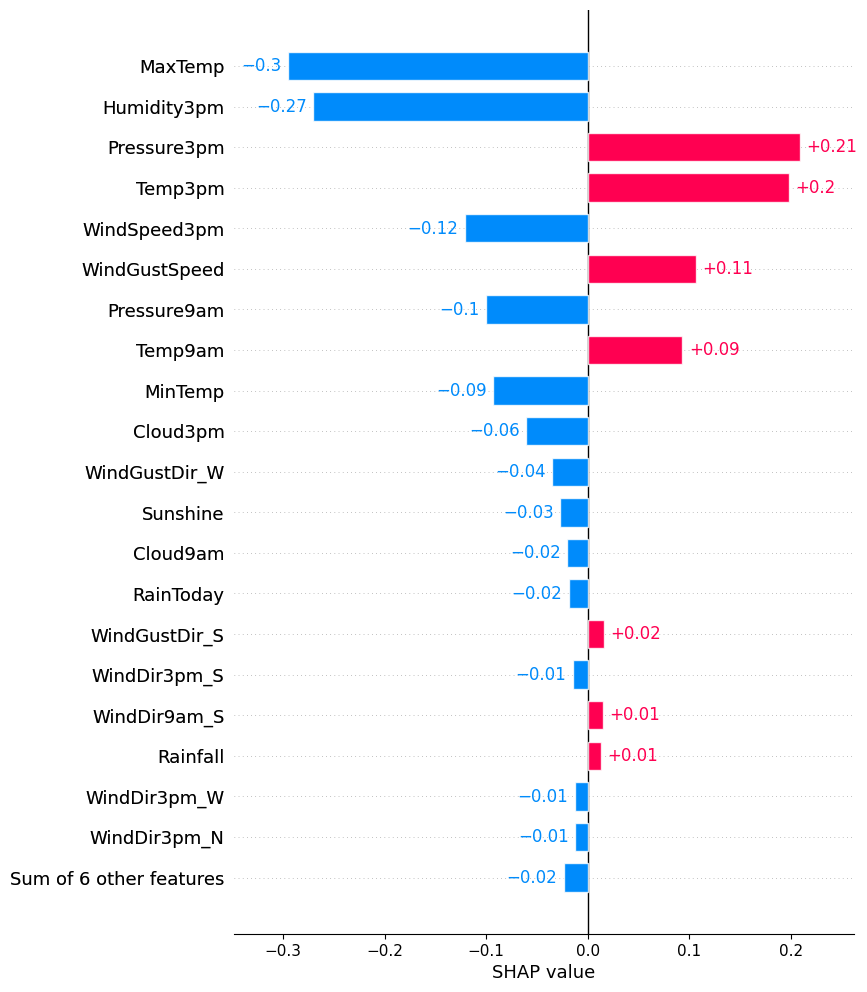

In [1318]:
# Crear la explicación para la instancia específica
explanation = shap.Explanation(values=shap_values, base_values=expected_value, feature_names=feature_names)

# Visualizar la explicación
shap.initjs()
shap.plots.bar(explanation, max_display=21)

De forma **Local** las varaibles que mas importancia tienen son MaxTemp, Humidity3pm, Pressure3pm y Temp3pm.

##### Explicabilidad Global

In [1322]:
instance_to_explain = X_train.sample(100)  

# Calcular los valores SHAP para los datos de prueba
shap_values = explainer.shap_values(instance_to_explain)

100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


In [1323]:
shap_values_squeezed = np.squeeze(shap_values)
feature_names = X_test.columns.values

In [1324]:
# Obtener el valor esperado (base value)
expected_value = explainer.expected_value

explanation = shap.Explanation(values=shap_values_squeezed, base_values=expected_value[0], feature_names=feature_names)

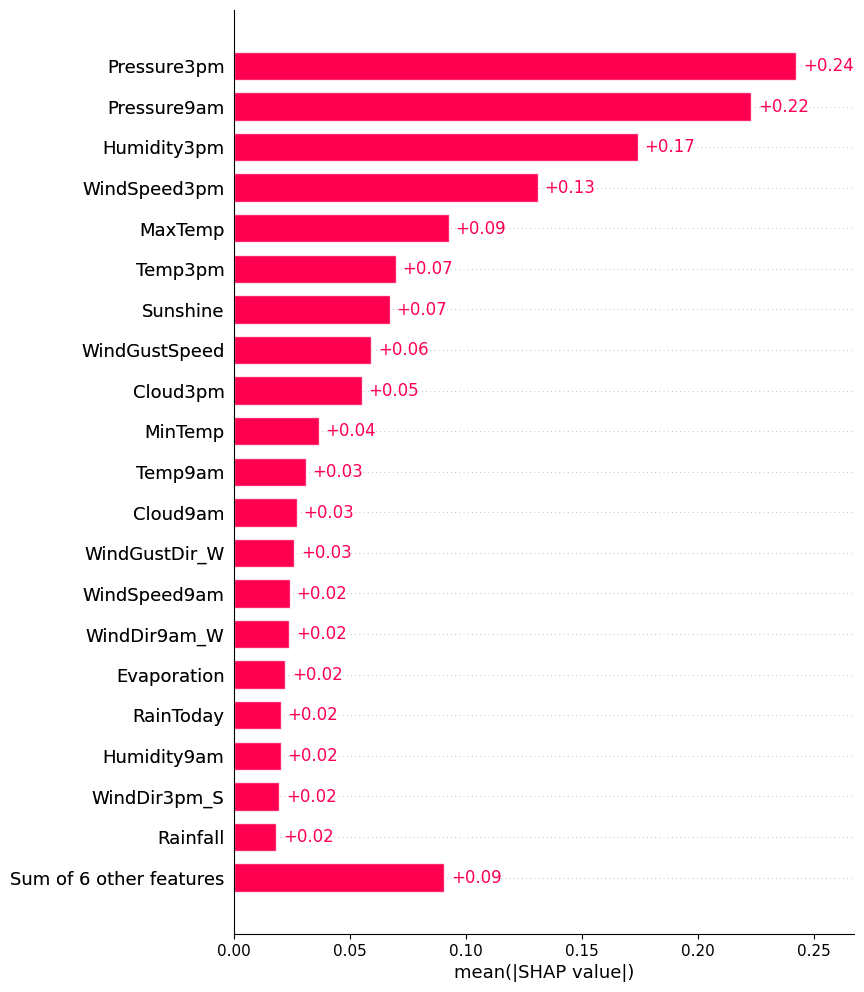

In [1325]:
# Visualizar la explicación
shap.initjs()
shap.plots.bar(explanation, max_display=21)

Las variables que mas aportan a la explicabilidad **Global** de mi modelo de redes neuronales son Pressure3pm, Pressure9am, Humidity3pm y WindSpeed3pm.

##### Conclusiones

| Modelo | Conjunto | MSE | 
|---------|---------|---------|
| Regresion Lineal | Train | 0.7837 |
| Regresion Lineal | Test | 0.9325 |
| Primer modelo de Redes Neuronales | Train | 0.8186 |
| Primer modelo de Redes Neuronales | Test | 1.0047 |
| Redes neuronales con hiperparámetros optimizados | Train | 0.6061 |

El modelo de redes neuronales con hiperparámetros optimizados ha logrado una reducción significativa en el MSE tanto en el conjunto de entrenamiento como en el de prueba, superando al modelo de regresión lineal y al primer modelo de redes neuronales.

El MSE en el conjunto de prueba es bastante cercano al del conjunto de entrenamiento, lo que sugiere que el modelo está generalizando bien sin sobreajustarse.

### RainTomorrow

### Modelo

### Optimizacion de Hiperparametros

In [1407]:
# Función objective para Optuna
def objective(trial):

    num_layers = trial.suggest_int('num_layers', 1, 3)
    model = Sequential()

    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 4, 128)  # Neuronas en cada capa
        model.add(Dense(num_units, activation='relu'))  # Capas densas con activación ReLU

    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy')

    # Sugerir el número de epochs como hiperparámetro
    epochs = trial.suggest_int('epochs', 5, 50)

    # Entrenar el modelo
    model.fit(X_train_rl, y_train_rl, validation_data=(X_test_rl, y_test_rl), epochs=epochs, batch_size=32, verbose=0)

    # Realizar predicciones en el conjunto de prueba
    predictions = model.predict(X_test_rl)
    predictions_binary = np.where(predictions > 0.5, 1, 0)

    # Calcular el F1-Score
    f1 = f1_score(y_test_rl, predictions_binary)

    return f1

In [ ]:
# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

In [1402]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Mejores parámetros encontrados:", best_params)

Mejores parámetros encontrados: {'num_layers': 1, 'n_units_layer_0': 23, 'epochs': 68}


Mejores parámetros encontrados: {'num_layers': 2, 'n_units_layer_0': 43, 'n_units_layer_1': 96, 'epochs': 17}

In [1458]:
class NeuralNetworkTensorFlowRl:
    def __init__(self, batch_size=32, epochs=10, learning_rate=0.001, dropout_rate=0.3, n_units_layer_0=64, n_units_layer_1=32):
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.n_units_layer_0 = n_units_layer_0
        self.n_units_layer_1 = n_units_layer_1
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()

        # Capa 1 con Dropout
        model.add(tf.keras.layers.Dense(self.n_units_layer_0, activation='relu', input_shape=(X_train_rl.shape[1],)))
        model.add(tf.keras.layers.Dropout(self.dropout_rate))  # Dropout

        # Capa 2 con Dropout
        model.add(tf.keras.layers.Dense(self.n_units_layer_1, activation='relu'))
        model.add(tf.keras.layers.Dropout(self.dropout_rate))  # Dropout

        # Capa de salida
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

        # Compilación del modelo con la métrica de F1-Score personalizada
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), 
                      loss='binary_crossentropy', 
                      metrics=[self.f1_score_custom_v2])
        return model

    def f1_score_custom_v2(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)  # Asegurarse de que y_true sea float32
        y_pred_bin = tf.cast(tf.where(y_pred > 0.5, 1.0, 0.0), tf.float32)  # Convertir y_pred a float32 después de binarizarlo

        true_positives = tf.reduce_sum(tf.multiply(y_true, y_pred_bin))
        false_positives = tf.reduce_sum(tf.multiply(1.0 - y_true, y_pred_bin))
        false_negatives = tf.reduce_sum(tf.multiply(y_true, 1.0 - y_pred_bin))

        precision_value = true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())
        recall_value = true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())

        f1_score_result = tf.where(
            tf.equal(precision_value + recall_value, 0.0),
            0.0,
            2 * precision_value * recall_value / (precision_value + recall_value + tf.keras.backend.epsilon())
        )
        
        return f1_score_result

    def fit(self, X, y, X_val=None, y_val=None):
        X = np.array(X)
        y = np.array(y)
        
        # Convertir los datos de validación a numpy si es necesario
        if isinstance(X_val, tf.Tensor):
            X_val = X_val.numpy()
        if isinstance(y_val, tf.Tensor):
            y_val = y_val.numpy()

        # Listas para almacenar las pérdidas por cada época
        losses = []
        
        for epoch in range(self.epochs):
            # Entrenar el modelo por una época y guardar la pérdida
            history = self.model.fit(X, y, epochs=1, batch_size=self.batch_size, verbose=0)
            losses.append(history.history['loss'][0])

            # Al final de cada época, calcular el F1-Score en los datos de validación
            if X_val is not None and y_val is not None:
                val_y_pred = self.model.predict(X_val)
                val_y_pred_bin = (val_y_pred > 0.5).astype(int)
                
                f1_value = sklearn_f1_score(y_val, val_y_pred_bin, average='weighted')
                print(f'Epoch {epoch + 1}/{self.epochs}: F1-Score en validación: {f1_value:.4f}')

        return losses

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions

In [1459]:
# Instanciar y entrenar el modelo
nn_model_rl = NeuralNetworkTensorFlowRl(batch_size=32, epochs=17, learning_rate=0.001, dropout_rate=0.3, n_units_layer_0=43, n_units_layer_1=96)
nn_model_rl.fit(X_train_rl, y_train_rl, X_test_rl, y_test_rl)

c:\Users\Francisco\Desktop\AA1-TUIA-RodriguezYBarros\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/17: F1-Score en validación: 0.8263
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
Epoch 2/17: F1-Score en validación: 0.8245
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
Epoch 3/17: F1-Score en validación: 0.8254
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
Epoch 4/17: F1-Score en validación: 0.8243
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
Epoch 5/17: F1-Score en validación: 0.8262
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
Epoch 6/17: F1-Score en validación: 0.8222
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
Epoch 7/17: F1-Score en validación: 0.8295
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
Epoch 8/17: F1-Score en validación: 0.8199
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
Epoch 9/17: F1-Score en validación: 0.8227
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
Epoch 10/17: F1-Score en validación: 0.8274
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
Epoch 11/17: F1-Score en validación: 0.8251
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
Epoch 12/17

[0.4095118045806885,
 0.374197393655777,
 0.36706268787384033,
 0.3627586364746094,
 0.36071091890335083,
 0.36012306809425354,
 0.3564973771572113,
 0.3548002541065216,
 0.3534679710865021,
 0.35170242190361023,
 0.3502615690231323,
 0.34994086623191833,
 0.3491852283477783,
 0.34670719504356384,
 0.34957873821258545,
 0.34902817010879517,
 0.3484068512916565]

In [1460]:
# Predicciones en el conjunto de Train y Test
y_pred_train = nn_model_rl.predict(X_train_rl)
y_pred_test = nn_model_rl.predict(X_test_rl)

# Predicciones a etiquetas binarias
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

# F1-Score Train
f1_score_train = sklearn_f1_score(y_train_rl, y_pred_train_binary, average='weighted')
print(f"F1 Score en el conjunto de entrenamiento: {f1_score_train}")

# F1-Score test
f1_score_test = sklearn_f1_score(y_test_rl, y_pred_test_binary, average='weighted')
print(f"F1 Score en el conjunto de prueba: {f1_score_test}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
F1 Score en el conjunto de entrenamiento: 0.8389271645822179
F1 Score en el conjunto de prueba: 0.8190255026804095


### Explicabilidad local

In [1466]:
# Crear un conjunto de muestras de fondo
background = X_train_rl.sample(100) 
explainer = shap.KernelExplainer(nn_model_rl.model.predict, background)  # Usar una muestra del conjunto de entrenamiento


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [1467]:
instance_to_explain = X_test_rl.iloc[0:1].values  # Seleccionar la línea 0

# Calcular los valores SHAP para los datos de prueba
shap_values = explainer.shap_values(instance_to_explain)

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6563/6563 ━━━━━━━━━━━━━━━━━━━━ 3s 523us/step


100%|██████████| 1/1 [00:05<00:00,  5.97s/it]


In [1468]:
# Obtener el valor esperado (base value)
expected_value = explainer.expected_value

# Hacer predicciones
index = 0  # índice de la instancia que queremos explicar
predicted_proba = nn_model_rl.predict(X_test_rl)[index]  # Predicción de probabilidad
predicted_class = np.argmax(predicted_proba)  # Clase predicha

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


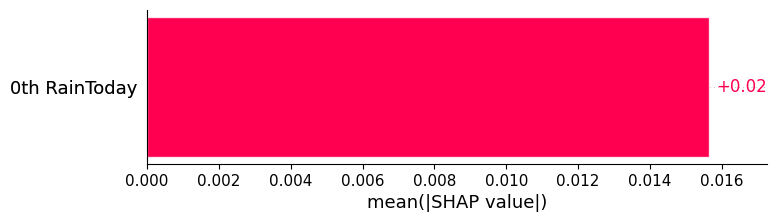

In [1469]:
# Crear la explicación para la instancia específica
explanation = shap.Explanation(values=shap_values[0], base_values=expected_value, feature_names=feature_names)

# Visualizar la explicación
shap.initjs()
shap.plots.bar(explanation, max_display=len(feature_names))

In [1470]:
shap.plots.waterfall(explanation, max_display=21)

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (26, 1)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.